# Practice Session 06: PageRank

We will compute PageRank on a graph that represents the web of UK around 2007. Each node is a host, and there is a link between two hosts if there is a web page in one of them pointing to a web page in the other one. This network is weighted: the weight is the number of pages that point from one host to the other one.

The collection we will use, [WEBSPAM-UK2007](http://chato.cl/webspam/datasets/uk2007/), has been used in multiple studies on the effect of web spam. Feel free to decompress these files to inspect them, **but your code must read only these files in compressed form**:

* ``webspam_uk2007-nodes.csv.gz`` contains (``nodeid``, ``hostname``, ``label``) records
* ``webspam_uk2007-edges.csv.gz`` contains (``source``, ``destination``, ``weight``) records

Your task is to compute PageRank twice: first considering all the links, and then ignoring links from or to a known spam host.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

# 1. Read host names

Read the names of the nodes and the labels. For this, you can use [csv.DictReader](https://docs.python.org/3/library/csv.html#csv.DictReader). Suppose ``FILENAME`` points to a file with the following contents:

```
a,b,c,d
1,2,3,4
5,6,7,8
```

The following code:

```python
with gzip.open(FILENAME, "rt", encoding="utf-8") as input_file:
    reader = csv.DictReader(input_file, delimiter=',', quotechar='"')
    for record in reader:
        print(record["b"])
```

Prints:

```
2
6
```

Remember in the `INPUT_NODES_FILENAME` each record contains ``nodeid``, ``hostname``, and ``label``.

Read the id to name mapping into a dictionary `id2name`, the name to id mapping into a dictionary `name2id`, and the id to label mapping into another dictionary `id2label`. The keys (nodeids) in both dictionaries should be converted to integers using ``int(...)``.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [1]:
import io
import gzip
import csv
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
INPUT_NODES_FILENAME = "webspam_uk2007-nodes.csv.gz"
INPUT_EDGES_FILENAME = "webspam_uk2007-edges.csv.gz"

<font size="+1" color="red">Replace this cell with your code to read the ``INPUT_NODES_FILENAME`` file into id2name, name2id, and id2label.</font>

Verify that you read correctly the file. It should have *114529* hosts: host number *107471* should be the University College of London, an unlabeled site, and host number *3735* should be a spam website that used to sell tickets to Ibiza.

If you get a *key not found* error, most likely you did not convert the ids to integers.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [10]:
# Leave as-is

print("Number of hosts: %s" % len(id2name))
print("%s: %s" % (id2name[107471], id2label[107471]))
print("%s: %s" % (id2name[3735], id2label[3735]))

Number of hosts: 114529
www.ucl.ac.uk: unlabeled
ibiza-tickets.co.uk: spam


Next, print how many hosts and what percentage have label `spam`, `nonspam`, and `unlabeled`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to print the number and percentage of the hosts are spam, nonspam, and unlabeled. The latter should be the large majority. Format the number with thousand separators and the percentage with one decimal (e.g., ``unlabeled: 108,476 (94.7%)``).</font>

Now let's explore a small part of the graph. For this, you will need to open the file `INPUT_EDGES_FILENAME` which contains columns `source`, `destination`, and `weight` indicating that some pages in host id `source` point to pages in host id `destination`. The number of such pages is the `weight`.

The graph is too large so we will focus on three categories that tend to be heavily spammed: shopping, financial services and adult content. We will use the following:

```python
spammywords = ['shop', 'directory', 'credit', 'mortgage', 'finance', 'debt', 'loan', 'discount', 'escort', 'xx', 'girl']
```

Now, create a directed graph `g = nx.DiGraph()` containing all the edges that fulfil **all three of the following conditions**:

1. The source contains one of the `spammywords` **or** the destination contains one of the `spammywords`
1. The source is labeled as either `spam` or `nonspam`
1. The destination is labeled as either `spam` or `nonspam`

Your graph should have nodes that are hostnames, so whenever you find such an edge in the input file, you should do:

```python
g.add_edge(id2name[source], id2name[destination])
```

Print the number of nodes in the resulting graph (`g.number_of_nodes()`), it should be less than 100.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to load a subgraph of the input graph, as described above.</font>

The following code, that you should leave as-is (or modify slightly, if you want), displays this subgraph.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

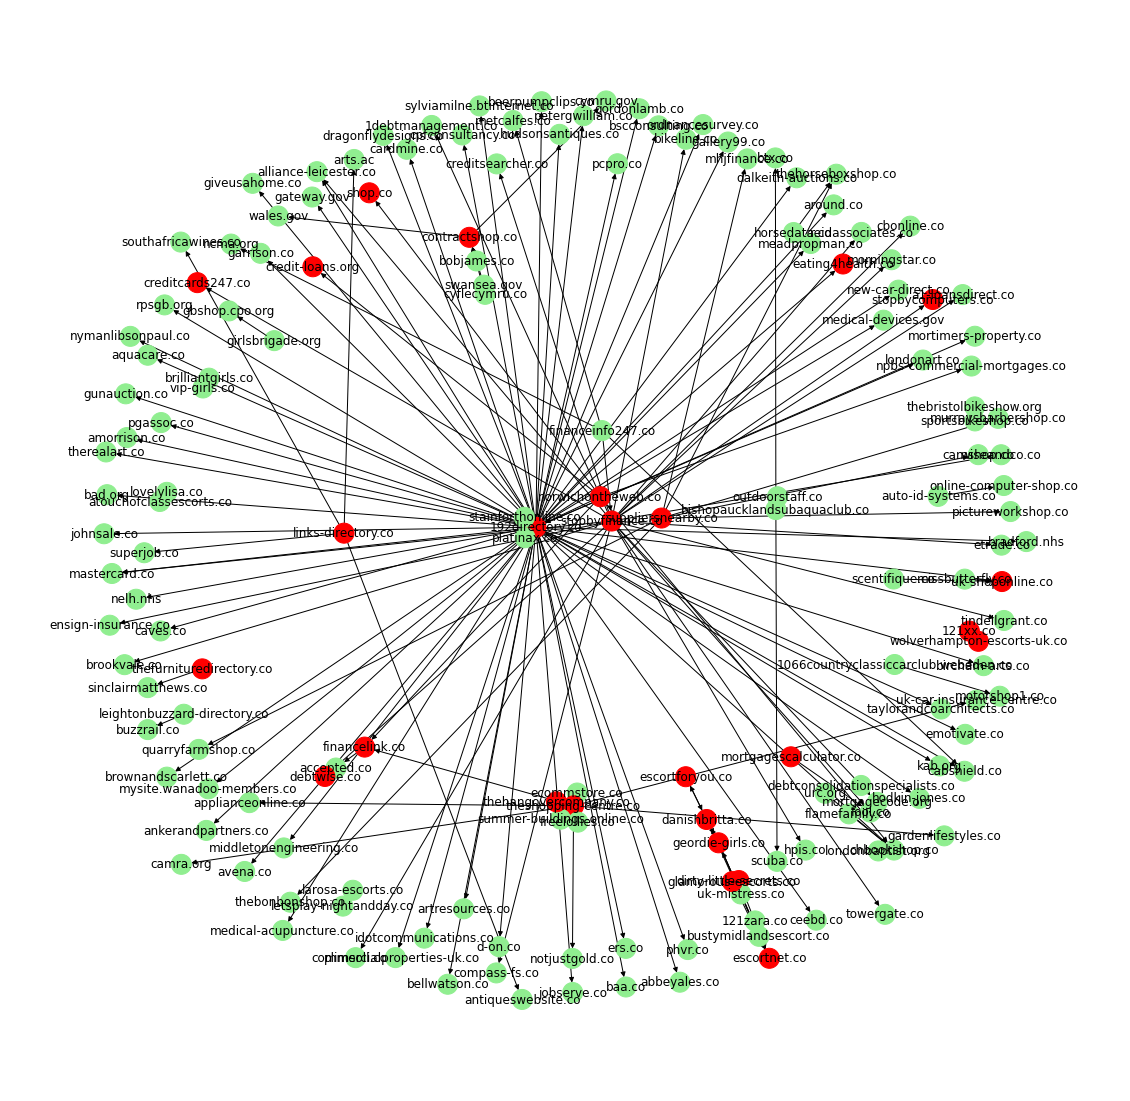

In [37]:
# Leave this code as-is, or modify slightly

colors = []
hostname_converted = {}

for hostname in g.nodes():
    # Assign colors to nodes according to spam/nonspam labels
    if id2label[name2id[hostname]] == 'spam':
        colors.append('red')
    elif id2label[name2id[hostname]] == 'nonspam':
        colors.append('lightgreen')
    else:
        colors.append('white')
    
    # Shorten the hostnames to generate labels    
    label = hostname.replace("www.", "").replace(".uk", "")
    hostname_converted[hostname] = label
    
# Notice that if you re-run this cell the layout will be different every time
plt.figure(figsize=(20, 20))
plt.axis('off')
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=True, node_size=400, node_color=colors, labels=hostname_converted)

<font size="+1" color="red">Replace this cell with a brief commentary on what you see in the plot above.</font>

# 2. Compute the degree of each node

Compute the out-degree of each node and store it in the dictionary id2degree. For this, you will need to read the edges file once, without trying to store the graph in main memory.

Remember that this file contains ``source``, ``destination``, ``weight`` records.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [38]:
# Leave this code as-is

id2degree = {}
N = len(id2name)
for nodeid in range(N):
    id2degree[nodeid] = 0

<font size="+1" color="red">Replace this cell with your code to read the degrees of nodes into id2degree.</font>

Verify that you are reading correctly the file. The following cell should print:

```
www.ucl.ac.uk: degree 1378
ibiza-tickets.co.uk: degree 1
www.financelink.co.uk: degree 5
```

If you get a key not found error, most likely you did not convert the ids to integers or you did not initialize the id2degree.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [44]:
# Leave this cell as-is

for nodeid in [107471, 3735, 48842]:
    print("%s: degree %d" % (id2name[nodeid], id2degree[nodeid]))

www.ucl.ac.uk: degree 1378
ibiza-tickets.co.uk: degree 1
www.financelink.co.uk: degree 5


# 3. Compute PageRank

Perform `iterations=20` iterations with `alpha=0.92`. In each iteration, you will read the file of the graph, **without loading the entire graph in memory**. This means each iteration involves opening (and implicitly, closing) the edges file.

Your code should do the following:

* At the beginning, initialize the vector `pagerank` as a vector of 1/N and the vector `pagerank_aux` as a vector of 0s.
* For `iterations` iterations:
   * Read the graph and for every link from *source* to *destination*:
      * Add to `pagerank_aux[destination]` the value `pagerank[source]/degree`, where *degree* is the out-degree of the source node (i.e, its number of out-links).
   * Set *pagerank* of every node to *alpha x pagerank_aux + (1.0-alpha) x (1.0/N)*.
   * Normalize the values of *pagerank* so they add up to 1.0
   * Compute and print *delta* as the sumation of the absolute changes in PageRank between this iteration and the previous one; this value should decrease from one iteration to the next
   * Set `pagerank_aux` to 0.0

Remember: do not keep the graph in memory, because that will limit the size of the graphs your code can handle. At every iteration you must read the file again. You can use the following template:

```python
for iteration in range(ITERATIONS):
    print("Iteration %d of %d" % (iteration+1, ITERATIONS))
    with gzip.open(INPUT_EDGES_FILENAME, "rt", encoding="utf-8") as input_file:
        ...

```

After each iteration, print the sum of absolute differences (L1 norm) between pagerank_aux and pagerank, with 4 decimals. This sum should be, in general, decreasing.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [52]:
# Leave this cell as-is

ITERATIONS = 20
ALPHA = 0.92

pagerank = [1.0/N] * N
pagerank_aux = [0.0] * N

<font size="+1" color="red">Replace this cell with your code to compute PageRank.</font>

# 4. Nodes with largest values of PageRank

Print the top 20 hosts by PageRank, including the host name, and the PageRank value with 6 decimals.

You can use the `enumerate()` function which converts a list `[a, b, c]` into `[(0,a), (1,b), (2,c)]` and then `sort()` as follows. Suppose ``score`` contains ``[0.2, 0.7, 0.4]``:

```python
hosts_by_score = sorted(enumerate(score), key=lambda x: x[1], reverse=True)
```

Will return the list `[(1,0.7), (2,0.4), (0,0.2)]`

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to print the 20 hosts having the largest PageRank. Print the host id, host name, label, and score with 6 decimals. Write a function because we will need to do this again.</font>

<font size="+1" color="red">Replace this cell with a brief commentary indicating: (1) why do you think the top sites are those ones, and (2) what is the percentage of commercial, government, and educational sites you see among the top 20?</font>

# 5. Run non-spam PageRank

Now, write code and run non-spam PageRank. For this, simply ignore any link in which the source and the destination are known spam hosts.

You can query this with ``id2label[source] != "spam" and id2label[destination] != "spam"``.

To run this, first you need to compute the "no-spam degree" of the nodes in a dictionary `id2nsdegree`, and use that degree of the nodes.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to compute id2nsdegree (ns stands for no-spam).</font>

Verify that you are reading correctly the file. The following cell should print:

```
www.ucl.ac.uk: normal degree 1378 nospam degree 1378
candycaine.skinthesun.co.uk: normal degree 22 nospam degree 20
www.financelink.co.uk: normal degree 5 nospam degree 0
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [61]:
# Leave this cell as-is

for nodeid in [107471, 1469, 48842]:
    print("%s: normal degree %d nospam degree %d" % (id2name[nodeid], id2degree[nodeid], id2nsdegree[nodeid]))

www.ucl.ac.uk: normal degree 1378 nospam degree 1378
candycaine.skinthesun.co.uk: normal degree 22 nospam degree 20
www.financelink.co.uk: normal degree 5 nospam degree 0


<font size="+1" color="red">Replace this cell with code to compute nspagerank (ns stands for no-spam).</font>

<font size="+1" color="red">Replace this cell with code to print the 20 hosts having the largest no-spam PageRank scores. Print the host id, host name, label, and score with 6 decimals.</font>

<font size="+1" color="red">Replace this cell with a brief commentary indicating if you see any differences between the non-spam PageRank scores of these hosts and their regular PageRank scores.</font>

# 6. Compute spam gain

Finally, compute the gain of every host as *(Normal PageRank) / (No spam PageRank)*.

Among the top 50 hosts you might find many "spam" (business that look ilegitimate or that tend to rely on spam such as gambling, pornography, counterfeits, and scams). You might also find "normal" sites (i.e., websites that look legitimate), because spammers also point to legitimate sites to disguise their actions.

Print the following:

* The hostname
* Its spam/nospam label
* Their gain *(Normal PageRank) / (No spam PageRank)* with two decimals (e.g., "3.22")
* Their PageRank in scientific notation with two significant digits (e.g., "5.8e-06")
* Their no-spam-PageRank in scientific notation with two significant digits (e.g., "5.8e-06")

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to print the top 30 hosts by spam gain.</font>

<font size="+1" color="red">Replace this cell with a brief commentary on the websites you find on this list, and your explanation, in your own words, of the effects of using the "non-spam PageRank".</font>

# Deliver (individually)

A .zip file containing:

* This notebook.


## Extra points available

If you would like to go for extra points, include a Cytoscape drawing of a sample of hosts (e.g., the top ones by PageRank, or the top ones by degree, perhaps restricted to '.co.uk' sites), and painting in one color the nodes that are spam, and in another color the nodes that are nonspam. Exclude the nodes that are *unlabeled*.

Include in your sample at least a few hundred hosts; as many as possible without crashing Cytoscape or having to wait an unreasonable amount of time for the layout to be completed.

*Tip*: the `subgraph` function in NetworkX allows you to select a sub-graph given a list of nodes.

**Note:** if you go for the extra points, add ``<font size="+2" color="blue">Additional results: spam/nonspam visualization</font>`` at the top of your notebook.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>